# Pytorch Implementation of Baseline Model

Jagyansis Jena,
EE22M054

**Importing Libraries**

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms #using inbuilt dataset inside pytorch
from torch import nn, optim  # for neural network training

**Loading and transforming dataset for neural network training**

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

**We are using dataset availble in pytorch for this part**

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform) # transformation is required to make it easy for NN training
testset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform) # it convers data to tensor and normalize them
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [4]:
trainset.data.shape # 60000 images with dimension 28 *28 pixels

torch.Size([60000, 28, 28])

In [5]:
trainset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [6]:
trainset.classes # 10 target classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
type(trainset[0]) # checking type of data

tuple

In [8]:
data, label = trainset[0]

In [9]:
data_batch, labels_batch = next(iter(trainloader)) # The datasets are not iterble so we use trainloader to shuffle and make them iterble
print(data_batch.size()) # batches of 64 and 28*28 pixel images in greyscale

torch.Size([64, 1, 28, 28])


**Visualization of data**

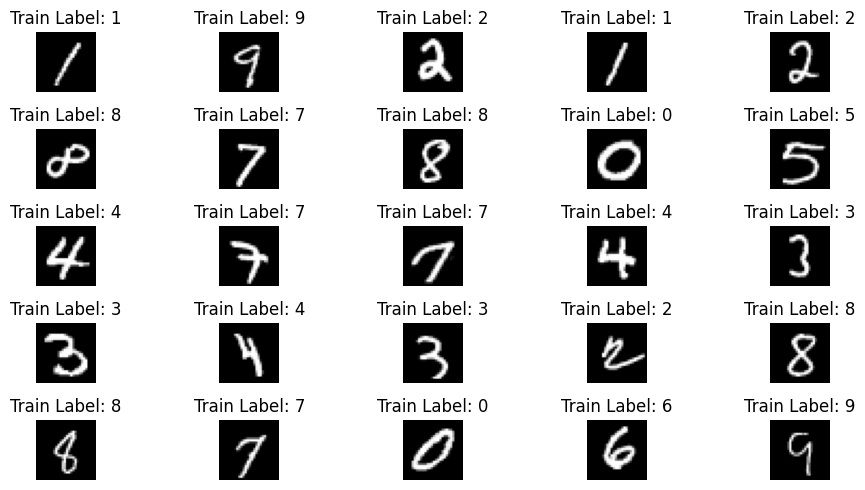

In [10]:
# Create a 5x5 subplot grid for visualization
fig, axes = plt.subplots(5, 5, figsize=(10, 5))
axes = axes.ravel()

# Visualize train dataset
for i, (images, labels) in enumerate(trainloader):
    for j in range(25):
        ax = axes[j]
        ax.imshow(images[j].squeeze().numpy(), cmap='gray')
        ax.set_title(f'Train Label: {labels[j]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    if i == 0:  # Show only the first batch of the train dataset
        break

# Baseline Neural Network

1. We implement baseline neural network and record its performance and then we will go to other better performing neural networks

In [11]:
# neural network
class NeuralNetwork1(nn.Module):
    def __init__(self):
        super(NeuralNetwork1, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 100)
        self.fc4 = nn.Linear(100, 10)  # Output layer with 10 neurons for 10 digits

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = self.fc4(x)  # Linear activation for output layer
        return torch.softmax(x, dim=1)  #  softmax is used for probabilities

In [12]:
simplenet = NeuralNetwork1() # description of our neural network
simplenet

NeuralNetwork1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [13]:
criterion = nn.CrossEntropyLoss() # loss crossentropy
optimizer = optim.Adam(simplenet.parameters(),
 lr=0.001) # optimizer adam with learing rate 0.001 , Neural network is diverging with LR =0.01


**Training of data and plotting loss**

Epoch 1, Mini-batch 200, Loss: 2.106, Accuracy: 35.61%
Epoch 1, Mini-batch 400, Loss: 1.785, Accuracy: 70.22%
Epoch 1, Mini-batch 600, Loss: 1.693, Accuracy: 78.26%
Epoch 1, Mini-batch 800, Loss: 1.644, Accuracy: 82.45%
Epoch 2, Mini-batch 200, Loss: 1.619, Accuracy: 84.59%
Epoch 2, Mini-batch 400, Loss: 1.603, Accuracy: 86.39%
Epoch 2, Mini-batch 600, Loss: 1.555, Accuracy: 91.41%
Epoch 2, Mini-batch 800, Loss: 1.540, Accuracy: 92.49%
Epoch 3, Mini-batch 200, Loss: 1.534, Accuracy: 92.99%
Epoch 3, Mini-batch 400, Loss: 1.529, Accuracy: 93.38%
Epoch 3, Mini-batch 600, Loss: 1.526, Accuracy: 93.80%
Epoch 3, Mini-batch 800, Loss: 1.522, Accuracy: 94.08%
Epoch 4, Mini-batch 200, Loss: 1.515, Accuracy: 94.83%
Epoch 4, Mini-batch 400, Loss: 1.516, Accuracy: 94.72%
Epoch 4, Mini-batch 600, Loss: 1.517, Accuracy: 94.70%
Epoch 4, Mini-batch 800, Loss: 1.518, Accuracy: 94.55%
Epoch 5, Mini-batch 200, Loss: 1.510, Accuracy: 95.22%
Epoch 5, Mini-batch 400, Loss: 1.512, Accuracy: 94.98%
Epoch 5, M

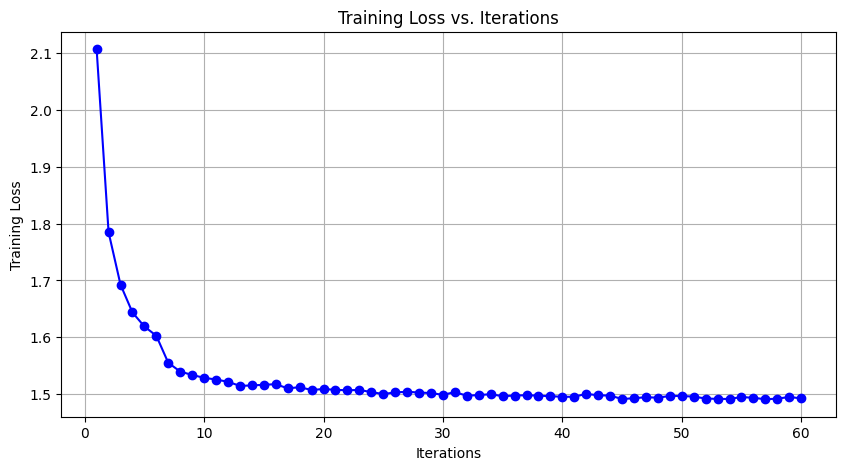

In [14]:

# Training parameters
num_epochs = 15
log_interval = 200  # Log loss and accuracy every 200 iterations

# Lists to store loss and accuracy values for plotting
loss_values = []
accuracy_values = []

# Step 4: Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images

        optimizer.zero_grad()

        outputs = simplenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        if i % log_interval == (log_interval - 1):
            avg_loss = running_loss / log_interval
            accuracy = (correct_predictions / total_samples) * 100
            loss_values.append(avg_loss)
            accuracy_values.append(accuracy)

            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct_predictions = 0
            total_samples = 0

print('Finished Training')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs * (len(trainloader) // log_interval) + 1), loss_values,'bo-')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iterations')
plt.grid(True)
plt.show()


**Accuracy Plot**

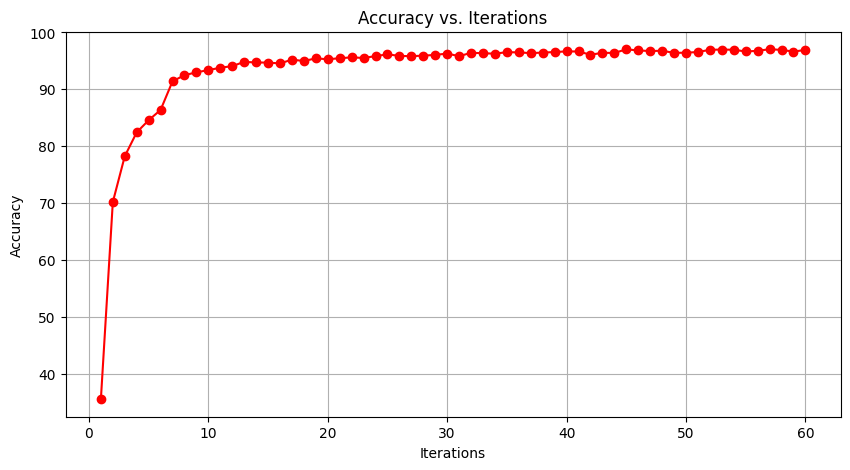

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs * (len(trainloader) // log_interval) + 1), accuracy_values,"ro-")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iterations')
plt.grid(True)
plt.show()

**Testing the data**

In [16]:
# testing

from sklearn.metrics import accuracy_score, confusion_matrix

# Define a function to evaluate the model on the test set
def test_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_labels = [] # empty lists for labels storing
    all_predictions = []

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    return np.array(all_labels), np.array(all_predictions)



true_labels, predicted_labels = test_model(simplenet, testloader)

# Calculating accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Creating a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)



# Displaying the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 95.82%
Confusion Matrix:
[[ 968    1    1    0    0    4    4    1    0    1]
 [   0 1122    5    1    1    2    4    0    0    0]
 [   5    1 1009    0    2    2    6    4    2    1]
 [   0    1   18  910    0   69    1    4    3    4]
 [   2    0    4    0  961    2    7    1    0    5]
 [   3    1    1    0    0  875    8    1    1    2]
 [   7    3    1    0    4    6  936    0    1    0]
 [   2   14   14    1    8    2    0  954    0   33]
 [   5    0   10    3    7   25   11    1  905    7]
 [   4    5    2    5   26   21    2    1    1  942]]


**classification report and confusion matrix**

In [17]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,target_names = testset.classes))

              precision    recall  f1-score   support

    0 - zero       0.97      0.99      0.98       980
     1 - one       0.98      0.99      0.98      1135
     2 - two       0.95      0.98      0.96      1032
   3 - three       0.99      0.90      0.94      1010
    4 - four       0.95      0.98      0.97       982
    5 - five       0.87      0.98      0.92       892
     6 - six       0.96      0.98      0.97       958
   7 - seven       0.99      0.93      0.96      1028
   8 - eight       0.99      0.93      0.96       974
    9 - nine       0.95      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Text(0.5, 0.98, 'Confusion Matrix')

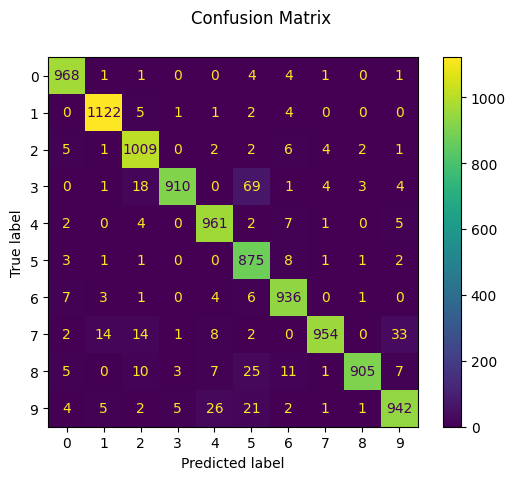

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels)
disp.figure_.suptitle("Confusion Matrix")

**L2 Regularization**

For L2 regularization we are just using the optimizer parameter of adam optimizer and passing an parameter of wright_decay of 0.001

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(simplenet.parameters(),
 lr=0.001,weight_decay = 0.001) # weight decay is l2 regularization


Epoch 1, Mini-batch 200, Loss: 1.493, Accuracy: 97.08%
Epoch 1, Mini-batch 400, Loss: 1.510, Accuracy: 96.58%
Epoch 1, Mini-batch 600, Loss: 1.544, Accuracy: 95.48%
Epoch 1, Mini-batch 800, Loss: 1.566, Accuracy: 93.88%
Epoch 2, Mini-batch 200, Loss: 1.584, Accuracy: 92.02%
Epoch 2, Mini-batch 400, Loss: 1.585, Accuracy: 91.90%
Epoch 2, Mini-batch 600, Loss: 1.590, Accuracy: 91.38%
Epoch 2, Mini-batch 800, Loss: 1.590, Accuracy: 91.26%
Epoch 3, Mini-batch 200, Loss: 1.586, Accuracy: 91.70%
Epoch 3, Mini-batch 400, Loss: 1.589, Accuracy: 91.24%
Epoch 3, Mini-batch 600, Loss: 1.592, Accuracy: 90.98%
Epoch 3, Mini-batch 800, Loss: 1.591, Accuracy: 90.84%
Epoch 4, Mini-batch 200, Loss: 1.587, Accuracy: 91.30%
Epoch 4, Mini-batch 400, Loss: 1.589, Accuracy: 91.07%
Epoch 4, Mini-batch 600, Loss: 1.590, Accuracy: 90.99%
Epoch 4, Mini-batch 800, Loss: 1.591, Accuracy: 90.80%
Epoch 5, Mini-batch 200, Loss: 1.586, Accuracy: 91.34%
Epoch 5, Mini-batch 400, Loss: 1.590, Accuracy: 90.84%
Epoch 5, M

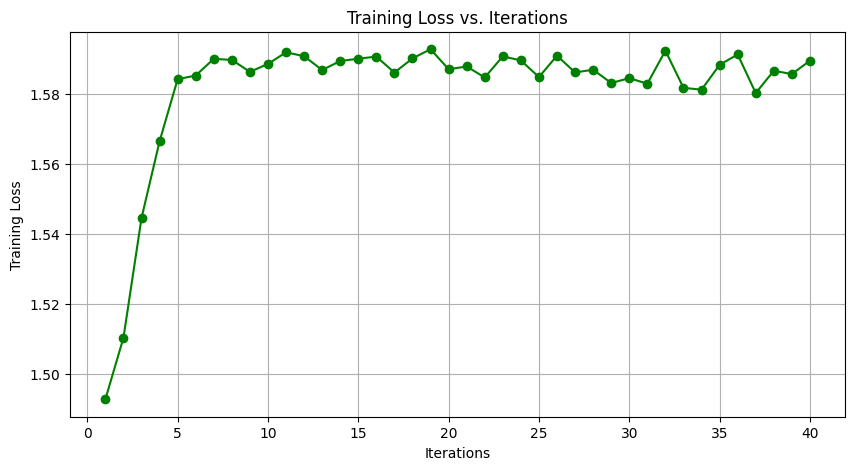

In [20]:
# Training parameters
num_epochs = 10
log_interval = 200  # Log loss and accuracy every 200 iterations

# Lists to store loss and accuracy values for plotting
loss_values = []
accuracy_values = []

# Step 4: Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images

        optimizer.zero_grad()

        outputs = simplenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        if i % log_interval == (log_interval - 1):
            avg_loss = running_loss / log_interval
            accuracy = (correct_predictions / total_samples) * 100
            loss_values.append(avg_loss)
            accuracy_values.append(accuracy)

            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct_predictions = 0
            total_samples = 0

print('Finished Training')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs * (len(trainloader) // log_interval) + 1), loss_values,'go-')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iterations')
plt.grid(True)
plt.show()


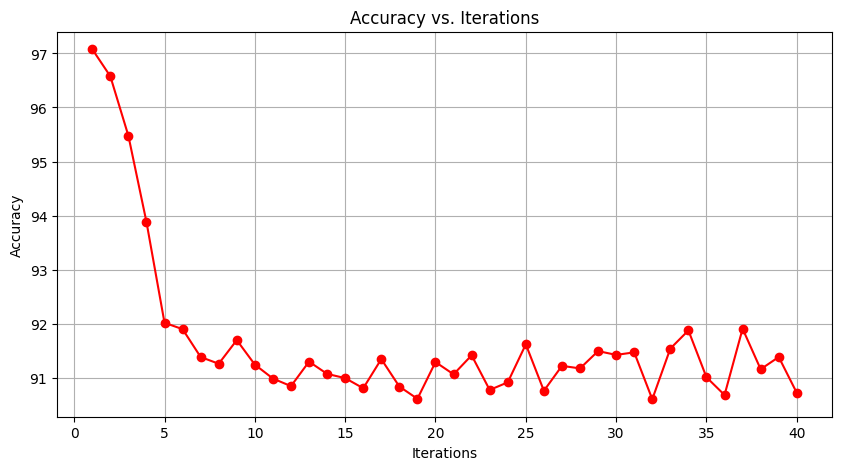

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs * (len(trainloader) // log_interval) + 1), accuracy_values,"ro-")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iterations')
plt.grid(True)
plt.show()

In [22]:
# testing

from sklearn.metrics import accuracy_score, confusion_matrix

# Define a function to evaluate the model on the test set
def test_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    return np.array(all_labels), np.array(all_predictions)



true_labels, predicted_labels = test_model(simplenet, testloader)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)



# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 92.28%
Confusion Matrix:
[[ 966    0    1    1    0    4    5    1    2    0]
 [   0 1107    5    3    0    2    3    1   14    0]
 [  17    0  960    5    8    0   18    7   12    5]
 [   3    0   45  914    0   16    1    7   16    8]
 [   1    3    4    0  901    1   24    1   10   37]
 [  16    2    7   35    8  768   26    3   22    5]
 [  16    2    4    0    9   11  913    0    3    0]
 [   7   11   54   10   11    0    0  898    1   36]
 [  13    2   16   10    8    5   20    2  885   13]
 [  16    6    4    6   26    7    2    5   21  916]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,target_names = testset.classes))

              precision    recall  f1-score   support

    0 - zero       0.92      0.99      0.95       980
     1 - one       0.98      0.98      0.98      1135
     2 - two       0.87      0.93      0.90      1032
   3 - three       0.93      0.90      0.92      1010
    4 - four       0.93      0.92      0.92       982
    5 - five       0.94      0.86      0.90       892
     6 - six       0.90      0.95      0.93       958
   7 - seven       0.97      0.87      0.92      1028
   8 - eight       0.90      0.91      0.90       974
    9 - nine       0.90      0.91      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Text(0.5, 0.98, 'Confusion Matrix')

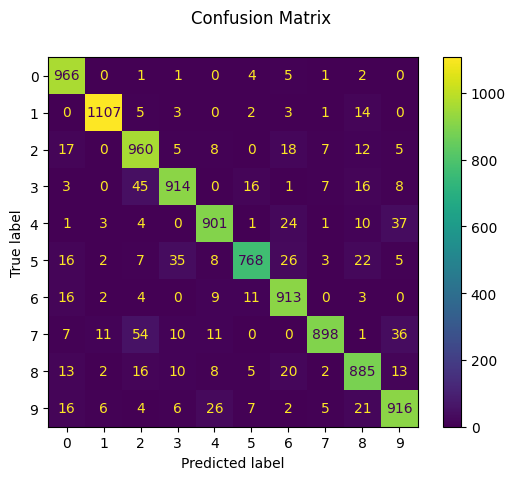

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels)
disp.figure_.suptitle("Confusion Matrix")

**L2 regularization** - (0.002)

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(simplenet.parameters(),
 lr=0.001,weight_decay = 0.002) # weight decay is l2 regularization


Epoch 1, Mini-batch 200, Loss: 1.609, Accuracy: 90.95%
Epoch 1, Mini-batch 400, Loss: 1.631, Accuracy: 89.06%
Epoch 1, Mini-batch 600, Loss: 1.633, Accuracy: 89.32%
Epoch 1, Mini-batch 800, Loss: 1.641, Accuracy: 88.18%
Epoch 2, Mini-batch 200, Loss: 1.641, Accuracy: 88.34%
Epoch 2, Mini-batch 400, Loss: 1.648, Accuracy: 87.73%
Epoch 2, Mini-batch 600, Loss: 1.641, Accuracy: 88.68%
Epoch 2, Mini-batch 800, Loss: 1.645, Accuracy: 87.96%
Epoch 3, Mini-batch 200, Loss: 1.646, Accuracy: 87.77%
Epoch 3, Mini-batch 400, Loss: 1.645, Accuracy: 87.95%
Epoch 3, Mini-batch 600, Loss: 1.648, Accuracy: 87.78%
Epoch 3, Mini-batch 800, Loss: 1.648, Accuracy: 87.84%
Epoch 4, Mini-batch 200, Loss: 1.643, Accuracy: 88.25%
Epoch 4, Mini-batch 400, Loss: 1.649, Accuracy: 87.52%
Epoch 4, Mini-batch 600, Loss: 1.652, Accuracy: 87.18%
Epoch 4, Mini-batch 800, Loss: 1.654, Accuracy: 86.88%
Epoch 5, Mini-batch 200, Loss: 1.651, Accuracy: 87.22%
Epoch 5, Mini-batch 400, Loss: 1.652, Accuracy: 87.15%
Epoch 5, M

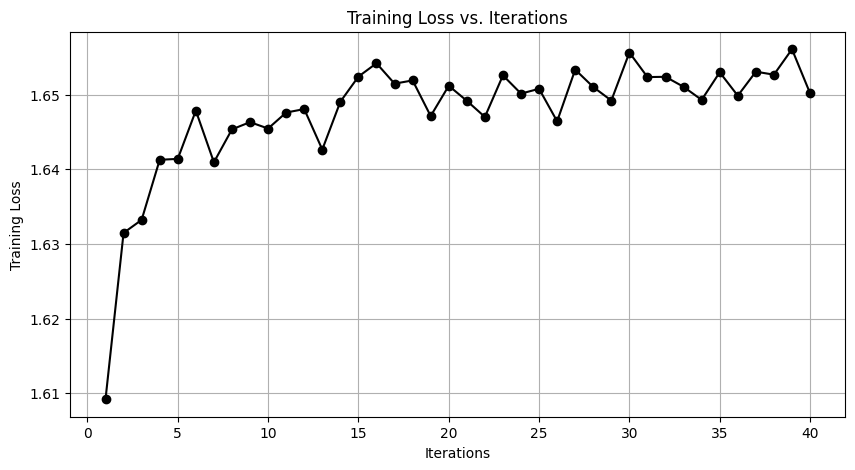

In [26]:
# Training parameters
num_epochs = 10
log_interval = 200  # Log loss and accuracy every 200 iterations

# Lists to store loss and accuracy values for plotting
loss_values = []
accuracy_values = []

# Step 4: Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images

        optimizer.zero_grad()

        outputs = simplenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        if i % log_interval == (log_interval - 1):
            avg_loss = running_loss / log_interval
            accuracy = (correct_predictions / total_samples) * 100
            loss_values.append(avg_loss)
            accuracy_values.append(accuracy)

            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct_predictions = 0
            total_samples = 0

print('Finished Training')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs * (len(trainloader) // log_interval) + 1), loss_values,"ko-")
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iterations')
plt.grid(True)
plt.show()


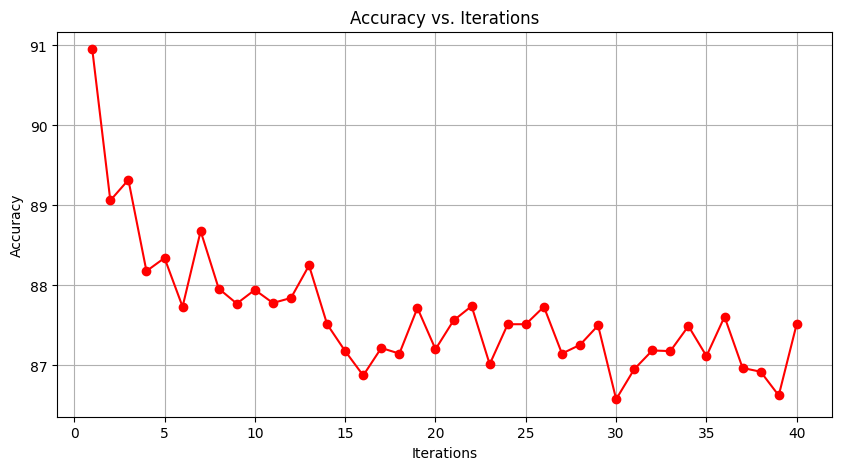

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs * (len(trainloader) // log_interval) + 1), accuracy_values,"ro-")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iterations')
plt.grid(True)
plt.show()

In [28]:
# testing

from sklearn.metrics import accuracy_score, confusion_matrix

# Define a function to evaluate the model on the test set
def test_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    return np.array(all_labels), np.array(all_predictions)



true_labels, predicted_labels = test_model(simplenet, testloader)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)



# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 86.57%
Confusion Matrix:
[[ 944    0    3    1    8    4    9    3    8    0]
 [   0 1073    1    8    1    0    1    1   48    2]
 [  18   16  837   31   22    0   14   11   56   27]
 [   4    3   21  878    0   34    1   11   33   25]
 [   1    4    1    0  863    0    9    1    3  100]
 [  25    3    7   67   42  625   20    6   74   23]
 [  20    4    4    0   58   14  834    0   24    0]
 [   3   22   16    8   20    0    0  814    6  139]
 [   5    3    1   16   26    7    8    1  853   54]
 [  13    1    1    9   27    6    1    5   10  936]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,target_names = testset.classes))

              precision    recall  f1-score   support

    0 - zero       0.91      0.96      0.94       980
     1 - one       0.95      0.95      0.95      1135
     2 - two       0.94      0.81      0.87      1032
   3 - three       0.86      0.87      0.87      1010
    4 - four       0.81      0.88      0.84       982
    5 - five       0.91      0.70      0.79       892
     6 - six       0.93      0.87      0.90       958
   7 - seven       0.95      0.79      0.87      1028
   8 - eight       0.77      0.88      0.82       974
    9 - nine       0.72      0.93      0.81      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.88      0.87      0.87     10000



Text(0.5, 0.98, 'Confusion Matrix')

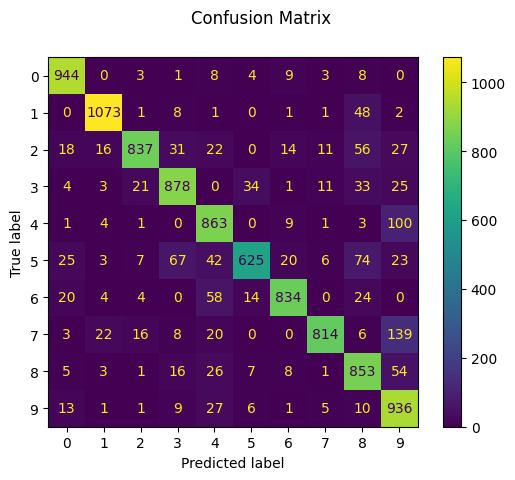

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels)
disp.figure_.suptitle("Confusion Matrix")

# Best performing model implementation

We will implement relu here

In [31]:
# neural network
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super(NeuralNetwork2, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 100)
        self.fc4 = nn.Linear(100, 10)  # Output layer with 10 neurons for 10 digits

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # Linear activation for output layer
        return torch.softmax(x, dim=1)  #  softmax is used for probabilities

In [32]:
simplenet2 = NeuralNetwork2() # description of our neural network
simplenet2

NeuralNetwork2(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [33]:
criterion = nn.CrossEntropyLoss() # loss crossentropy
optimizer = optim.Adam(simplenet2.parameters(),
 lr=0.001) # optimizer adam with learing rate 0.001 , Neural network is diverging with LR =0.01


Epoch 1, Mini-batch 200, Loss: 1.850, Accuracy: 61.65%
Epoch 1, Mini-batch 400, Loss: 1.712, Accuracy: 75.09%
Epoch 1, Mini-batch 600, Loss: 1.658, Accuracy: 80.31%
Epoch 1, Mini-batch 800, Loss: 1.592, Accuracy: 87.20%
Epoch 2, Mini-batch 200, Loss: 1.554, Accuracy: 90.87%
Epoch 2, Mini-batch 400, Loss: 1.550, Accuracy: 91.20%
Epoch 2, Mini-batch 600, Loss: 1.542, Accuracy: 91.95%
Epoch 2, Mini-batch 800, Loss: 1.540, Accuracy: 92.06%
Epoch 3, Mini-batch 200, Loss: 1.539, Accuracy: 92.20%
Epoch 3, Mini-batch 400, Loss: 1.530, Accuracy: 93.17%
Epoch 3, Mini-batch 600, Loss: 1.532, Accuracy: 92.91%
Epoch 3, Mini-batch 800, Loss: 1.528, Accuracy: 93.27%
Epoch 4, Mini-batch 200, Loss: 1.525, Accuracy: 93.71%
Epoch 4, Mini-batch 400, Loss: 1.526, Accuracy: 93.45%
Epoch 4, Mini-batch 600, Loss: 1.527, Accuracy: 93.39%
Epoch 4, Mini-batch 800, Loss: 1.520, Accuracy: 94.09%
Epoch 5, Mini-batch 200, Loss: 1.524, Accuracy: 93.63%
Epoch 5, Mini-batch 400, Loss: 1.522, Accuracy: 93.83%
Epoch 5, M

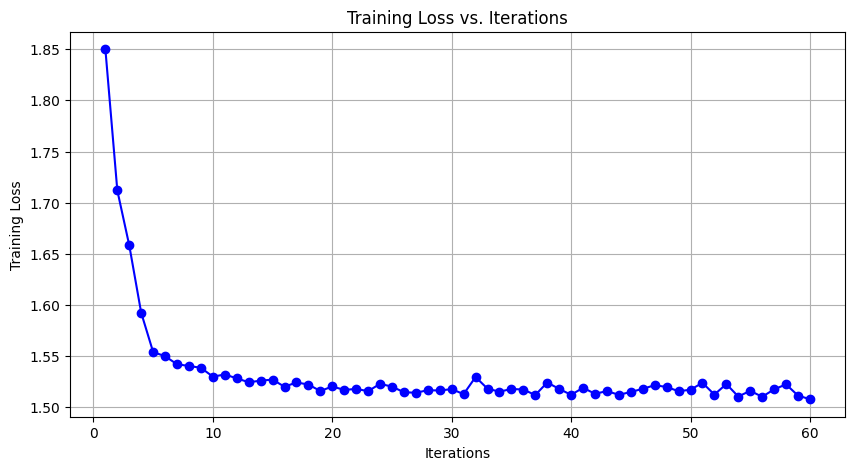

In [34]:
# Training parameters
num_epochs = 15
log_interval = 200  # Log loss and accuracy every 200 iterations

# Lists to store loss and accuracy values for plotting
loss_values = []
accuracy_values = []

# Step 4: Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images

        optimizer.zero_grad()

        outputs = simplenet2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        if i % log_interval == (log_interval - 1):
            avg_loss = running_loss / log_interval
            accuracy = (correct_predictions / total_samples) * 100
            loss_values.append(avg_loss)
            accuracy_values.append(accuracy)

            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct_predictions = 0
            total_samples = 0

print('Finished Training')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs * (len(trainloader) // log_interval) + 1), loss_values,'bo-')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iterations')
plt.grid(True)
plt.show()


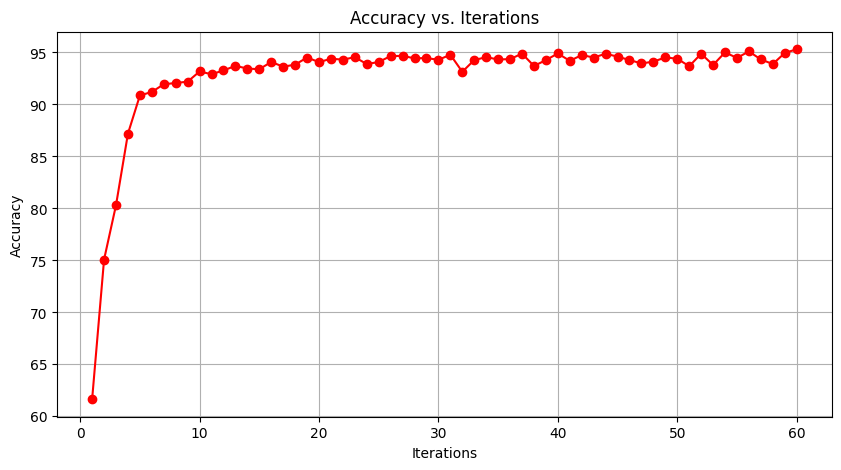

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs * (len(trainloader) // log_interval) + 1), accuracy_values,"ro-")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iterations')
plt.grid(True)
plt.show()

In [36]:
# testing

from sklearn.metrics import accuracy_score, confusion_matrix

# Define a function to evaluate the model on the test set
def test_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    return np.array(all_labels), np.array(all_predictions)



true_labels, predicted_labels = test_model(simplenet2, testloader)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 93.94%


In [37]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,target_names = testset.classes))

              precision    recall  f1-score   support

    0 - zero       0.98      0.96      0.97       980
     1 - one       0.98      0.98      0.98      1135
     2 - two       0.97      0.91      0.94      1032
   3 - three       0.81      0.98      0.89      1010
    4 - four       0.91      0.96      0.94       982
    5 - five       0.96      0.91      0.94       892
     6 - six       0.93      0.98      0.95       958
   7 - seven       0.97      0.92      0.94      1028
   8 - eight       0.97      0.89      0.93       974
    9 - nine       0.94      0.89      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Text(0.5, 0.98, 'Confusion Matrix')

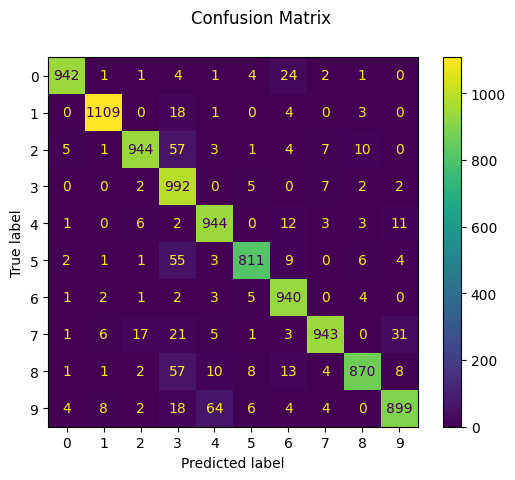

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels)
disp.figure_.suptitle("Confusion Matrix")

# with regularization

In [39]:
# neural network
class NeuralNetwork3(nn.Module):
    def __init__(self):
        super(NeuralNetwork3, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 100)
        self.fc4 = nn.Linear(100, 10)  # Output layer with 10 neurons for 10 digits

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # Linear activation for output layer
        return torch.softmax(x, dim=1)  #  softmax is used for probabilities

In [40]:
simplenet3 = NeuralNetwork3() # description of our neural network
simplenet3

NeuralNetwork3(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [41]:
criterion = nn.CrossEntropyLoss() # loss crossentropy
optimizer = optim.Adam(simplenet3.parameters(),
 lr=0.001,weight_decay = 0.001) # optimizer adam with learing rate 0.001 , Neural network is diverging with LR =0.01

Epoch 1, Mini-batch 200, Loss: 1.841, Accuracy: 63.13%
Epoch 1, Mini-batch 400, Loss: 1.686, Accuracy: 78.22%
Epoch 1, Mini-batch 600, Loss: 1.659, Accuracy: 80.74%
Epoch 1, Mini-batch 800, Loss: 1.590, Accuracy: 87.66%
Epoch 2, Mini-batch 200, Loss: 1.564, Accuracy: 90.15%
Epoch 2, Mini-batch 400, Loss: 1.557, Accuracy: 91.15%
Epoch 2, Mini-batch 600, Loss: 1.552, Accuracy: 91.46%
Epoch 2, Mini-batch 800, Loss: 1.546, Accuracy: 92.08%
Epoch 3, Mini-batch 200, Loss: 1.539, Accuracy: 92.74%
Epoch 3, Mini-batch 400, Loss: 1.536, Accuracy: 93.09%
Epoch 3, Mini-batch 600, Loss: 1.535, Accuracy: 93.26%
Epoch 3, Mini-batch 800, Loss: 1.531, Accuracy: 93.62%
Epoch 4, Mini-batch 200, Loss: 1.528, Accuracy: 94.04%
Epoch 4, Mini-batch 400, Loss: 1.531, Accuracy: 93.54%
Epoch 4, Mini-batch 600, Loss: 1.529, Accuracy: 93.70%
Epoch 4, Mini-batch 800, Loss: 1.525, Accuracy: 94.30%
Epoch 5, Mini-batch 200, Loss: 1.528, Accuracy: 93.97%
Epoch 5, Mini-batch 400, Loss: 1.522, Accuracy: 94.41%
Epoch 5, M

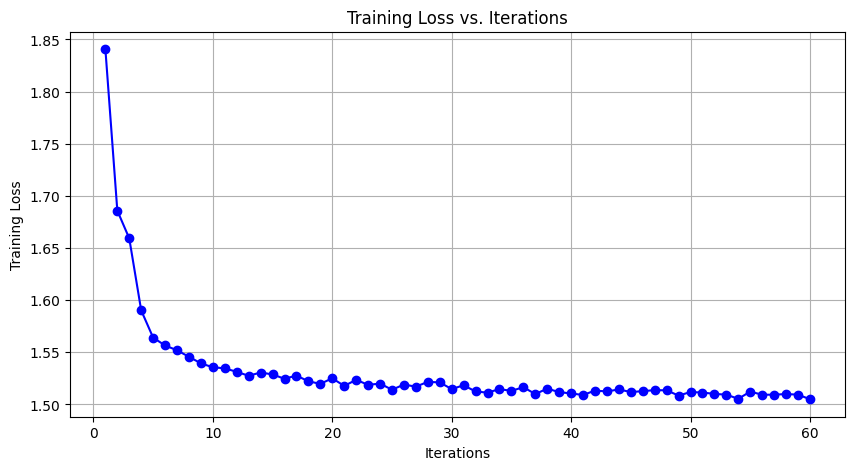

In [42]:
# Training parameters
num_epochs = 15
log_interval = 200  # Log loss and accuracy every 200 iterations

# Lists to store loss and accuracy values for plotting
loss_values = []
accuracy_values = []

# Step 4: Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images

        optimizer.zero_grad()

        outputs = simplenet3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        if i % log_interval == (log_interval - 1):
            avg_loss = running_loss / log_interval
            accuracy = (correct_predictions / total_samples) * 100
            loss_values.append(avg_loss)
            accuracy_values.append(accuracy)

            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct_predictions = 0
            total_samples = 0

print('Finished Training')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs * (len(trainloader) // log_interval) + 1), loss_values,'bo-')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iterations')
plt.grid(True)
plt.show()


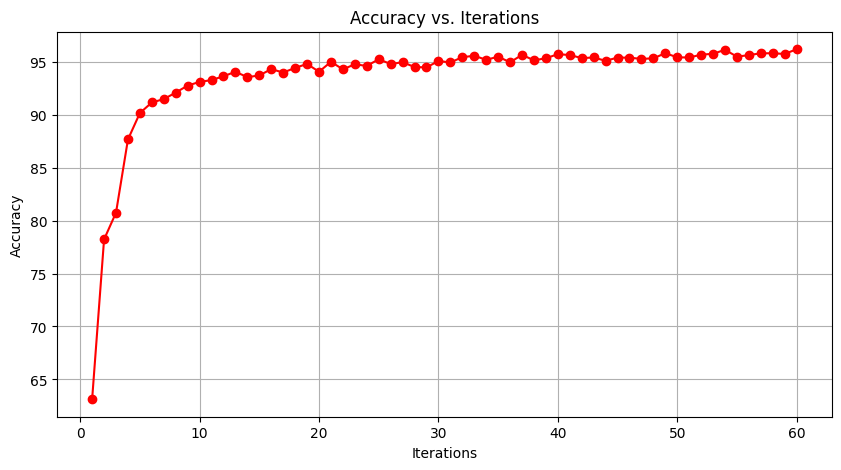

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs * (len(trainloader) // log_interval) + 1), accuracy_values,"ro-")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iterations')
plt.grid(True)
plt.show()

In [44]:
# testing

from sklearn.metrics import accuracy_score, confusion_matrix

# Define a function to evaluate the model on the test set
def test_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs = inputs.view(inputs.size(0), -1)  # Flatten the input images
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    return np.array(all_labels), np.array(all_predictions)



true_labels, predicted_labels = test_model(simplenet3, testloader)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 95.27%


In [45]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels,target_names = testset.classes))

              precision    recall  f1-score   support

    0 - zero       0.94      0.99      0.97       980
     1 - one       0.98      0.99      0.98      1135
     2 - two       0.97      0.95      0.96      1032
   3 - three       0.94      0.97      0.96      1010
    4 - four       0.98      0.87      0.93       982
    5 - five       0.96      0.94      0.95       892
     6 - six       0.98      0.95      0.96       958
   7 - seven       0.92      0.97      0.94      1028
   8 - eight       0.96      0.95      0.95       974
    9 - nine       0.91      0.93      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



Text(0.5, 0.98, 'Confusion Matrix')

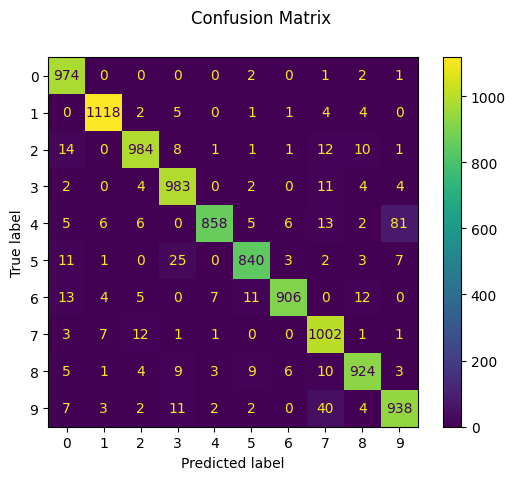

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels)
disp.figure_.suptitle("Confusion Matrix")

**Results**
1. With relu and sigmoid the accuracy in both cases are good and 95 percent.
2. In case of L2 regularization of sigmoid we saw a peculier behaviour the loss is increasing as the accuracy is decreasing. The reason behind this is I used the same trained model for L2 by just changing the optimizer conditions. So i guess the trained parameters which is already saved(cache) in the previous training is used again and it gave an initial accuracy of 90 percent and then the accuracy decreased and loss increased with weight decay.
3. The same case is not applicable for relu model while apply L2 I defined the neural network again.
4. The weight decay of o.oo1 has no significant effect in case of relu
